## Analysis of Open Reaction Database Citations

# Parsing a .bib file to DataFrame

Using code from https://github.com/Lukas2357/BibParse to parse the .bib library.

In [3]:
# load the dependencies
from bib_parser import parse_bibtex, open_pdfs
from bib_formatter import save_xlsx

In [4]:
# Specify bibtex fields you want to parse. You can also manually add columns in the xlsx
# file ones it is created, that are kept. Add those here as well:
fields = ['title', 'month', 'year', 'author', 'journal', 'note', 'abstract']

In [5]:
# Get the fields into DataFrame as columns (index=title):
bib_df = parse_bibtex(fields, file='ORD Citations.bib')

In [7]:
# turn title into a column and reset index
bib_df.reset_index(inplace=True)
#print(bib_df.head(5))

In [8]:
# Display the DataFrame:
bib_df.head()

,index,title,month,year,author,journal,note,abstract
0,0,Collaborative Methods to Enhance Reproducibili...,NaN,2023,"A.~Leins, Drew and B.~Haase, Steven and Eslami...",Digital Discovery,NaN,"Many domains across physical, life, and social..."
1,1,The Rise of Self-Driving Labs in Chemical and ...,June,2023,"Abolhasani, Milad and Kumacheva, Eugenia",Nat. Synth,NaN,Accelerating the discovery of new molecules an...
2,2,Multimetallic-Catalyzed C--C Bond-Forming Reac...,March,2023,"Ackerman-Biegasiewicz, Laura K. G. and Kariofi...",J. Am. Chem. Soc.,NaN,The use of two or more metal catalysts in a re...
3,3,Extracting Structured Data from Organic Synthe...,NaN,2024,"Ai, Qianxiang and Meng, Fanwang and Shi, Jiale...",Digital Discovery,NaN,The popularity of data-driven approaches and m...
4,4,A Graph Representation of Molecular Ensembles ...,NaN,2022,"Aldeghi, Matteo and W.~Coley, Connor",Chemical Science,NaN,Synthetic polymers are versatile and widely us...


In [68]:
# Inspect the df
bib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     245 non-null    int64 
 1   title     245 non-null    object
 2   month     177 non-null    object
 3   year      245 non-null    object
 4   author    244 non-null    object
 5   journal   169 non-null    object
 6   note      9 non-null      object
 7   abstract  244 non-null    object
dtypes: int64(1), object(7)
memory usage: 15.4+ KB


In [10]:
# Save to formatted .xlsx file:
#save_xlsx(bib_df, "ord_overview.xlsx", cols=fields)

# Citations by year

In [11]:
# load packages for chart
from matplotlib import pyplot as plt

In [12]:
years = bib_df['year'].sort_values().unique()
print(years)

['2022' '2023' '2024' '2025']


In [13]:
df_sorted = bib_df.loc[bib_df['year'].isin(years)].sort_values(by=['year'])
#print(df_sorted)
year_counts_sorted = df_sorted['year'].value_counts().sort_index()
print(year_counts_sorted)

year
2022    47
2023    67
2024    85
2025    46
Name: count, dtype: int64


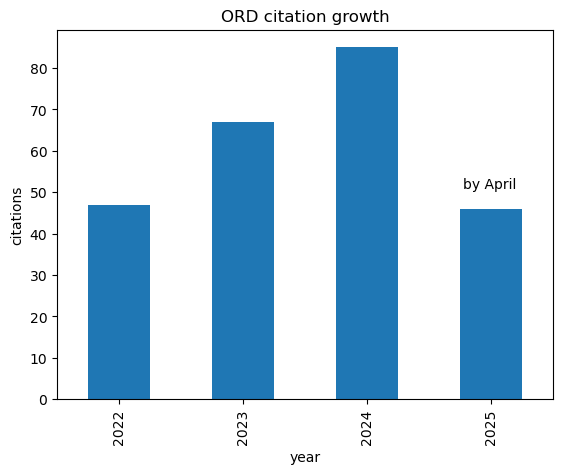

In [131]:
year_counts_sorted.plot(kind='bar')

plt.title('ORD citation growth')
plt.xlabel('year')
plt.ylabel('citations')
plt.figtext(0.76, 0.55, 'by April')
plt.savefig('ord_citations_per_year.png', facecolor = 'w', bbox_inches= 'tight')

plt.show()

# wordcloud

In [91]:
# import packages
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

In [29]:
text = bib_df['title'][0]
print(text)

Collaborative Methods to Enhance Reproducibility and Accelerate Discovery


In [31]:
wordcloud = WordCloud().generate(text)

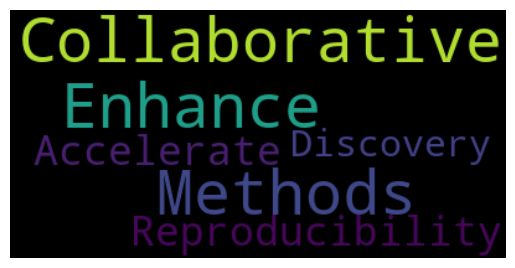

In [25]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Wordcloud of titles

In [115]:
# join the titles
text = " ".join(title for title in bib_df['title'])
print("there are {} words in the combination of all titles".format(len(text)))

there are 20328 words in the combination of all titles


In [116]:
# convert to lower case
#text = re.sub(r'[^A-Aa-z\s]', '', text)
text = text.lower()
print("there are {} words in the combination of all abstracts".format(len(text)))

there are 20328 words in the combination of all abstracts


In [122]:
wordcloud = WordCloud(width=1600, height=800, background_color= 'white').generate(text)

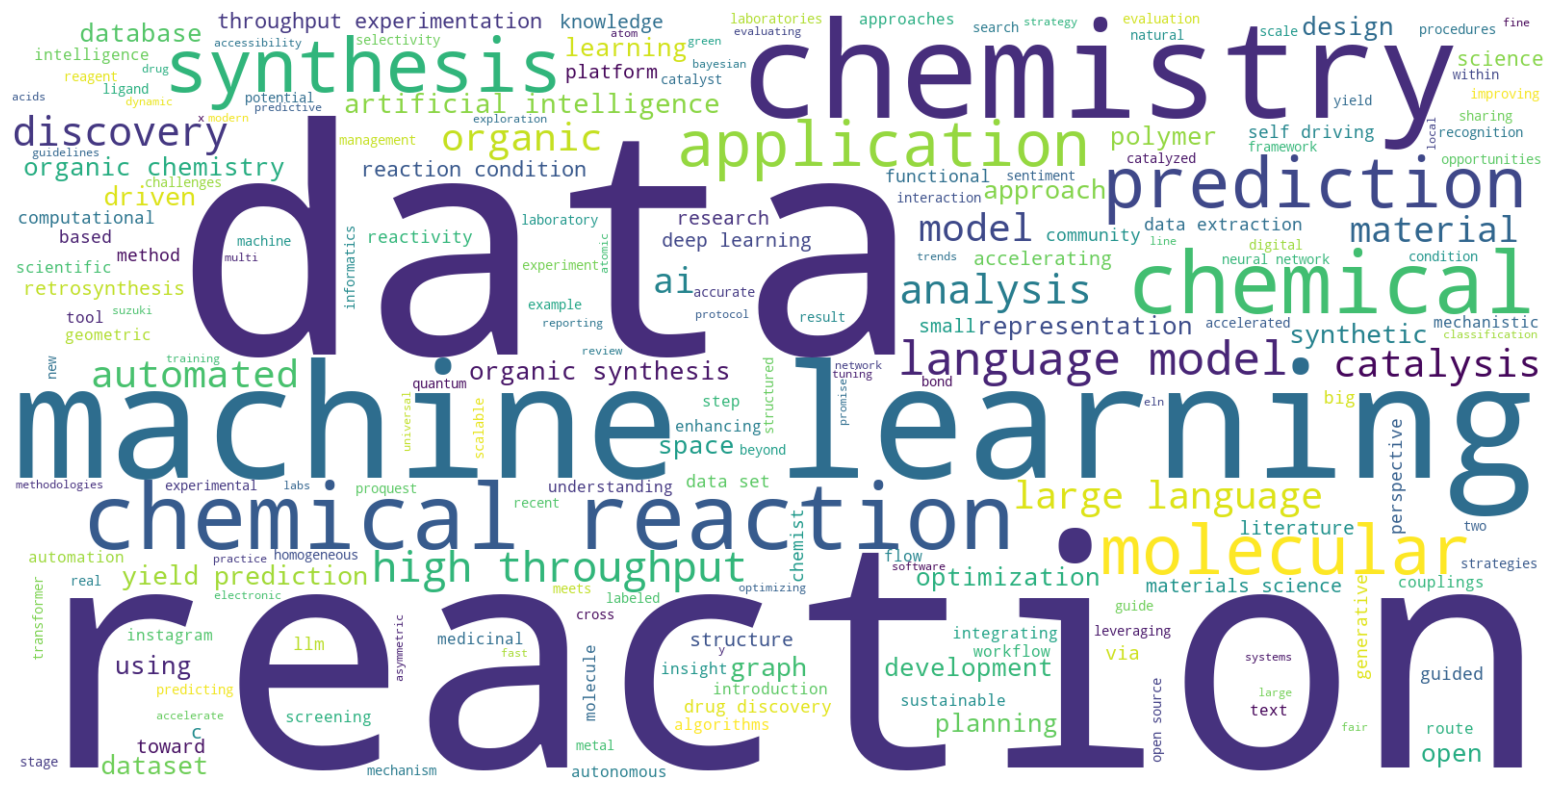

In [123]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('ord_citation_title_wordcloud.png', facecolor = 'w', bbox_inches= 'tight')
plt.show()

### Wordcloud of abstracts

In [124]:
# drop the row with a null abstract
cleaned_df = bib_df[['title', 'abstract']].dropna()
print(cleaned_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 244
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     244 non-null    object
 1   abstract  244 non-null    object
dtypes: object(2)
memory usage: 5.7+ KB
None


In [125]:
# join the abstracts
text = " ".join(abstract for abstract in cleaned_df['abstract'])
print("there are {} words in the combination of all abstracts".format(len(text)))

there are 319873 words in the combination of all abstracts


In [126]:
# convert to lower case
#text = re.sub(r'[^A-Aa-z\s]', '', text)
text = text.lower()
print("there are {} words in the combination of all abstracts".format(len(text)))

there are 319873 words in the combination of all abstracts


In [127]:
# remove stopwords
stopwords = set(STOPWORDS)
text = " ".join(word for word in text.split() if word not in stopwords)
print("there are {} words in the combination of all abstracts".format(len(text)))

there are 262329 words in the combination of all abstracts


In [128]:
# make the wordcloud
wordcloud = WordCloud(width=1600, height=800, background_color= 'white').generate(text)

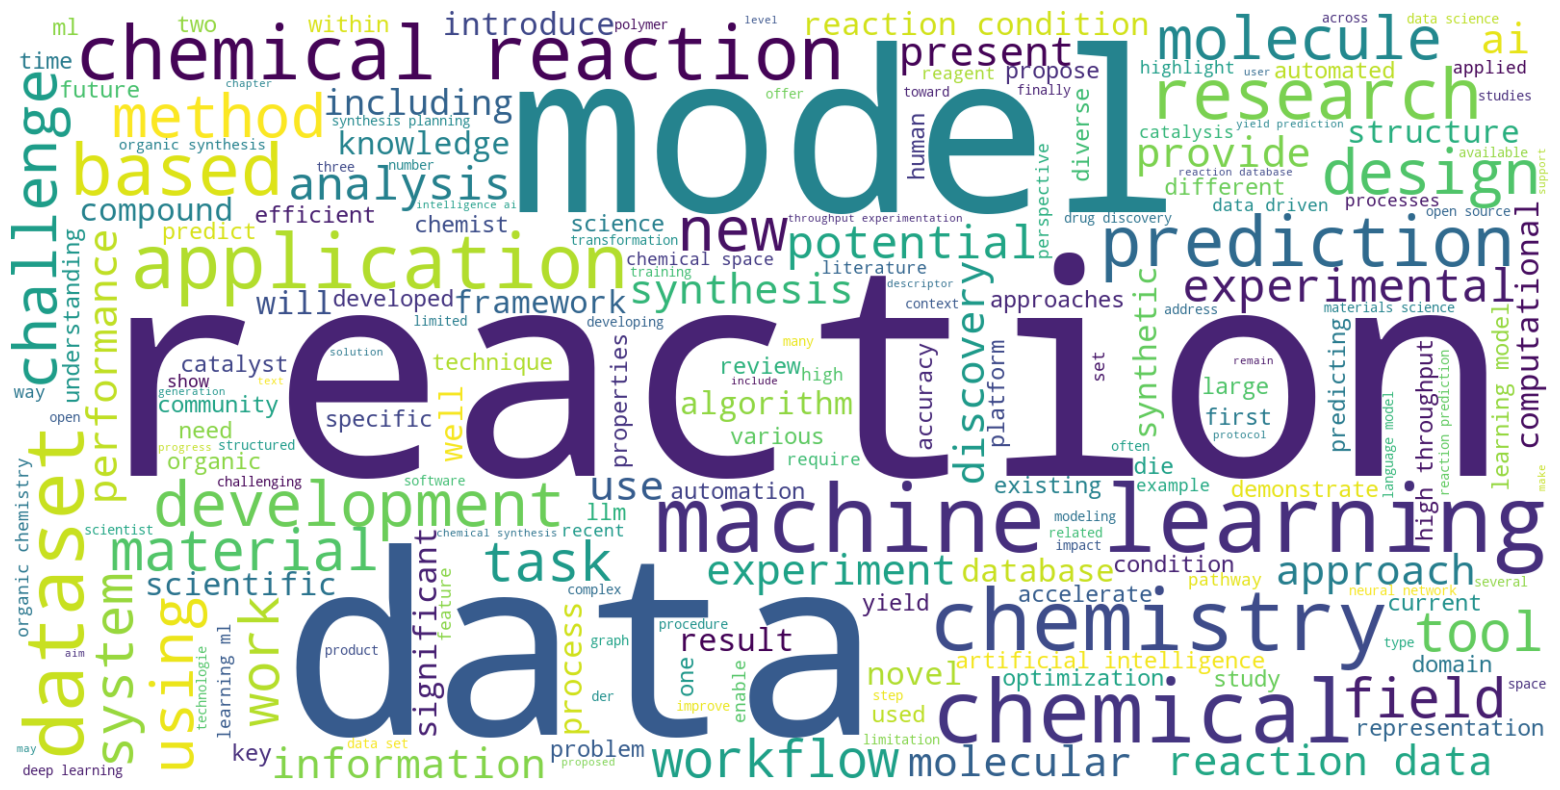

In [129]:
# configure the image
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('ord_citation_abstract_wordcloud.png', facecolor = 'w', bbox_inches= 'tight')
plt.show()